
# Generating Data for Exercises

This notebook contains the code used to generate the datasets for the exercises. The primary purpose of sharing this notebook is to allow students to compare their results with the provided data and to encourage exploration and experimentation with the data generation process.

**Instructions:**
- This notebook is meant to be reviewed only after completing the exercises.
- Feel free to modify the code to better understand how the data was constructed.
- Remember, the dataset structure and values were designed to align with the learning objectives of the exercises.


## 1. Data for Exercise in Model Selection (`model_selection_big.csv`)

The dataset includes six independent variables and one dependent variable (`y`), constructed with linear and quadratic contributions as well as random noise to simulate real-world conditions. A clean version of the target variable (`y_clean`) is also created for comparison. The data is saved as `synthetic_dataset.csv` for further use.

### Parameters That Can Be Adjusted and Their Insights:

- **Location and scale of each variable**: Adjusting these parameters explores the impact of variables being in significantly different units. For example, does a variable with larger values overshadow the importance of smaller ones? This is critical because even a variable with small variation might strongly influence the dependent variable.

- **Equation governing the dependent variable**: Experiment with different formulations—linear, quadratic, or including cross-terms like `x1*x3`. This allows testing how various relationships between variables influence the outcomes.

- **Number of samples (`n_samples`)**: Explore how dataset size affects model performance. What happens with fewer data points versus abundant data? Investigate the meaning of "small data" and how it varies depending on the number of variables.

- **Random seed**: Changing the seed affects the random realization of the dataset. Examine how consistent results are across different random initializations and how much they depend on the data structure versus chance.

- **Noise**: Test the impact of increasing noise variance or changing its distribution (e.g., non-normal). This helps understand how robust models are to different levels and types of randomness in the data.

---

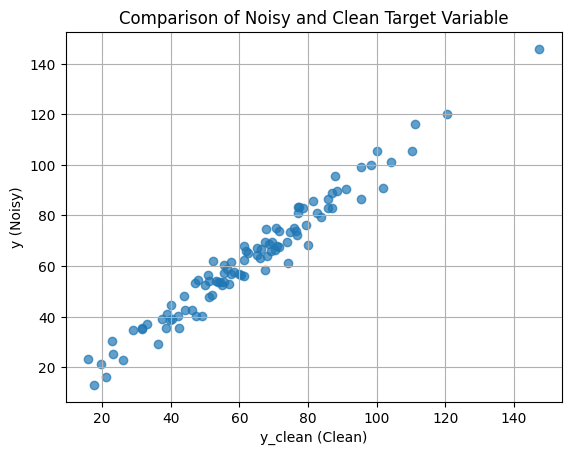

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for reproducibility and dataset customization
n_samples = 100
noise_standard_dev = 5
np.random.seed(7976)

# Define parameters for independent variables
variables = {
    'x1': {'loc': 100, 'scale': 10},
    'x2': {'loc': 4, 'scale': 1},
    'x3': {'loc': 50, 'scale': 5},
    'x4': {'loc': 20, 'scale': 2},
    'x5': {'loc': 0, 'scale': 1}, 
    'x6': {'loc': 0, 'scale': 5},
}
noise = np.random.normal(loc=0, scale=noise_standard_dev, size=n_samples)  


# Step 1: Generate independent variables
data = {}
for var, params in variables.items():
    data[var] = np.random.normal(loc=params['loc'], scale=params['scale'], size=n_samples)

# Convert to DataFrame
data = pd.DataFrame(data)

# Step 2: Define the dependent variable (y)
# Contributions from linear and non-linear terms

# Define a clean version of the dependent variable (y_clean)
y_clean = (
    1.5 * data['x1']
    - 2.0 * data['x2']
    + 0.2 * ((data['x3'] - 50) ** 2)
    - 0.2 * (data['x4'] ** 2)
)

# Define a noisy version of the dependent variable (y_clean)
data['y'] = y_clean + noise 



# Step 3: Save to CSV (optional)
data.to_csv("model_selection_big.csv", index=False)

# Step 4: Visualization
plt.scatter(y_clean, data['y'], alpha=0.7)
plt.title('Comparison of Noisy and Clean Target Variable')
plt.xlabel('y_clean (Clean)')
plt.ylabel('y (Noisy)')
plt.grid(True)
plt.show()

#### Small set
Here, we are going to create now a small dataset, with only 3 variables (of which one is not used) (`model_selection_small.csv`)

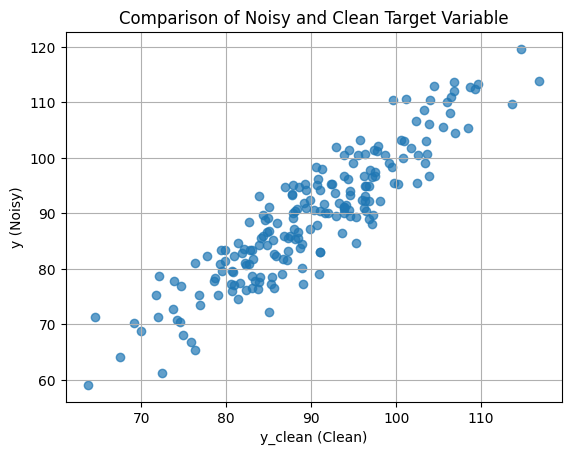

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for reproducibility and dataset customization
n_samples = 200
noise_standard_dev = 5
np.random.seed(7976)

# Define parameters for independent variables
variables = {
    'x1': {'loc': 10, 'scale': 1},
    'x2': {'loc': 5, 'scale': 1},
    'x3': {'loc':3, 'scale': 5},

}
noise = np.random.normal(loc=0, scale=noise_standard_dev, size=n_samples)  


# Step 1: Generate independent variables
data = {}
for var, params in variables.items():
    data[var] = np.random.normal(loc=params['loc'], scale=params['scale'], size=n_samples)

# Convert to DataFrame
data = pd.DataFrame(data)

# Step 2: Define the dependent variable (y)
# Contributions from linear and non-linear terms

# Define a clean version of the dependent variable (y_clean)
y_clean = (
    10 * data['x1']
    - 2.0 * data['x2']
)

# Define a noisy version of the dependent variable (y_clean)
data['y'] = y_clean + noise 



# Step 3: Save to CSV (optional)
data.to_csv("model_selection_small.csv", index=False)

# Step 4: Visualization
plt.scatter(y_clean, data['y'], alpha=0.7)
plt.title('Comparison of Noisy and Clean Target Variable')
plt.xlabel('y_clean (Clean)')
plt.ylabel('y (Noisy)')
plt.grid(True)
plt.show()